In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set the working directory
os.chdir(r"C:\Users\kasey.woo\Desktop\Python Projects\Analyzing E-Commerce Orders")

In [3]:
# Check the current working directory
print(os.getcwd())

C:\Users\kasey.woo\Desktop\Python Projects\Analyzing E-Commerce Orders


In [4]:
# load the orders data
orders_data = pd.read_excel('orders.xlsx')

In [5]:
# load the payments data 
# if it is a csv file, you would use pd.read_csv
payments_data = pd.read_excel('order_payment.xlsx')

In [6]:
# load the customers data
customers_data = pd.read_excel('customers.xlsx')

In [7]:
# describing the data
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99444 entries, 0 to 99443
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99444 non-null  object        
 1   customer_id                    99444 non-null  object        
 2   order_status                   99444 non-null  object        
 3   order_purchase_timestamp       99444 non-null  datetime64[ns]
 4   order_approved_at              99284 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97661 non-null  datetime64[ns]
 6   order_delivered_customer_date  96479 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99444 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [8]:
payments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103887 entries, 0 to 103886
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103887 non-null  object 
 1   payment_sequential    103887 non-null  int64  
 2   payment_type          103887 non-null  object 
 3   payment_installments  103887 non-null  int64  
 4   payment_value         103885 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [9]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [10]:
# handling missing data
# check for missing data in the orders data
orders_data.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [11]:
payments_data.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           2
dtype: int64

In [12]:
customers_data.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
# filling in the missing data in orders data with a default value
orders_data2 = orders_data.fillna('N/A')

In [14]:
# check if there are null values in orders_data2
orders_data2.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [15]:
# drop rows with missing values in payments data
payments_data = payments_data.dropna()

In [16]:
# check if there are null values in payments_data
payments_data.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [17]:
# removing duplicate data
# check for duplicates in our orders data
orders_data.duplicated().sum()

3

In [18]:
# remove duplicates from orders data
orders_data = orders_data.drop_duplicates()

In [19]:
orders_data.duplicated().sum()

0

In [20]:
# check for duplicates in our payments data
payments_data.duplicated().sum()

1

In [21]:
# remove duplicates from payments data
payments_data = payments_data.drop_duplicates()

In [22]:
payments_data.duplicated().sum()

0

In [23]:
# filtering the data
# select a subset of the orders data based on the order status
invoiced_orders_data = orders_data[orders_data['order_status'] == 'invoiced']

In [24]:
# reset the index 
invoiced_orders_data.reset_index(drop = True)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
1,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
2,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaT,NaT,2017-08-28
3,51b0dccc8596ce37a930dff2d63a10a2,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,NaT,NaT,2017-06-06
4,5504eaa5a86eb25fa666cf2e6b96c701,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,NaT,NaT,2017-12-20
...,...,...,...,...,...,...,...,...
309,41ad2ae32ee66c07ef3b0301ba02ad27,5c7f8d14a0a12198d1d07167d7d343b3,invoiced,2017-11-24 15:54:47,2017-11-24 19:33:24,NaT,NaT,2017-12-18
310,9ffb325177b96c422447e3b9ee9a6270,e4079117ea0dc8bc27274e34c4796515,invoiced,2018-05-10 19:11:18,2018-05-10 19:37:27,NaT,NaT,2018-06-05
311,021dac6e3120485db6a77474aa21b979,c40f7f00e91eb8a0da1e58484380a796,invoiced,2017-11-24 22:46:09,2017-11-25 01:53:42,NaT,NaT,2017-12-15
312,c526fe83c01c48066394ff5d81f9ab9a,6c678c38f3a0874b7bfeeb2d5fb22876,invoiced,2018-08-07 11:11:30,2018-08-07 11:25:01,NaT,NaT,2018-08-17


In [27]:
# select a subset of the payments data where payment type = Credit Card and payment value > 1000
credit_card_payments_type = payments_data[(payments_data['payment_type'] == 'credit_card') & (payments_data['payment_value'] > 1000)]

In [28]:
credit_card_payments_type

,order_id,payment_sequential,payment_type,payment_installments,payment_value
161,886b114d034f4ac1d39d964c1b2a8182,1,credit_card,10,2027.16
168,62d9b911d7c56cf455f660eecb8ddd3a,1,credit_card,10,1002.73
248,4ff8e28200e5a7a50b448cfaaf1f8ed3,1,credit_card,10,2288.31
360,ce6d150fb29ada17d2082f4847107665,1,credit_card,10,1586.47
435,e11fec6c25945565c1ef4f14fc3c03b7,1,credit_card,10,1995.69
...,...,...,...,...,...
103606,21a3f15754b759c91fff4535aaeb3486,1,credit_card,10,1224.03
103623,b0b0d3285e59abf2f6c9d7e1bf761323,1,credit_card,10,3044.12
103719,fc20b8e282da6f3fbcdd3a3cedecb723,1,credit_card,10,3782.19
103734,fb2dccfadca8cd6ebddc5d10ae48d1f7,1,credit_card,3,1134.44


In [30]:
customers_data_state = customers_data[customers_data['customer_state'] == 'SP']
customers_data_state

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99432,f255d679c7c86c24ef4861320d5b7675,d111b06b6f3a2add0d2241325f65b5ca,13500,rio claro,SP
99434,f5a0b560f9e9427792a88bec97710212,b3e53d18a997f27a3ffd16da497eaf58,7790,cajamar,SP
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP


In [31]:
# Merge and join dataframes
# merge orders data with payments data on order_id column
merged_data = pd.merge(orders_data, payments_data, on = 'order_id')

In [33]:
# join the merged data with our customers data on the customer_id column
joined_data = pd.merge(merged_data, customers_data, on = 'customer_id')
joined_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103879,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1,credit_card,3,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
103880,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,credit_card,3,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
103881,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,credit_card,5,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
103882,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,credit_card,4,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [35]:
# Data Visualizations
joined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103884 entries, 0 to 103883
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103884 non-null  object        
 1   customer_id                    103884 non-null  object        
 2   order_status                   103884 non-null  object        
 3   order_purchase_timestamp       103884 non-null  datetime64[ns]
 4   order_approved_at              103709 non-null  datetime64[ns]
 5   order_delivered_carrier_date   101996 non-null  datetime64[ns]
 6   order_delivered_customer_date  100752 non-null  datetime64[ns]
 7   order_estimated_delivery_date  103884 non-null  datetime64[ns]
 8   payment_sequential             103884 non-null  int64         
 9   payment_type                   103884 non-null  object        
 10  payment_installments           103884 non-null  int64         
 11  

In [37]:
# create a field called month_year from order_purchase_timestamp
joined_data["month_year"] = joined_data["order_purchase_timestamp"].dt.to_period('M')
joined_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103879,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1,credit_card,3,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017-03
103880,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,credit_card,3,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018-02
103881,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,credit_card,5,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017-08
103882,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,credit_card,4,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01


In [39]:
joined_data['week_year'] = joined_data['order_purchase_timestamp'].dt.to_period('W')
joined_data['year'] = joined_data['order_purchase_timestamp'].dt.to_period('Y')
joined_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month_year,week_year,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017-10-02/2017-10-08,2017
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017-10-02/2017-10-08,2017
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017-10-02/2017-10-08,2017
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,2018-07-23/2018-07-29,2018
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,2018-08-06/2018-08-12,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103879,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1,credit_card,3,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017-03,2017-03-06/2017-03-12,2017
103880,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,credit_card,3,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018-02,2018-02-05/2018-02-11,2018
103881,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,credit_card,5,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017-08,2017-08-21/2017-08-27,2017
103882,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,credit_card,4,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01,2018-01-08/2018-01-14,2018


In [44]:
grouped_data = joined_data.groupby('month_year')['payment_value'].sum()
grouped_data = grouped_data.reset_index()
grouped_data

,month_year,payment_value
0,2016-09,252.24
1,2016-10,59090.48
2,2016-12,19.62
3,2017-01,138488.04
4,2017-02,291908.01
5,2017-03,449863.60
6,2017-04,417788.03
7,2017-05,592918.82
8,2017-06,511276.38
9,2017-07,592382.92


In [46]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   month_year     25 non-null     period[M]
 1   payment_value  25 non-null     float64  
dtypes: float64(1), period[M](1)
memory usage: 532.0 bytes


In [51]:
# convert month_year from period into string
grouped_data['month_year'] = grouped_data['month_year'].astype(str)

In [52]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month_year     25 non-null     object 
 1   payment_value  25 non-null     float64
dtypes: float64(1), object(1)
memory usage: 532.0+ bytes


Text(0.5, 1.0, 'Payment Value by Month & Year')

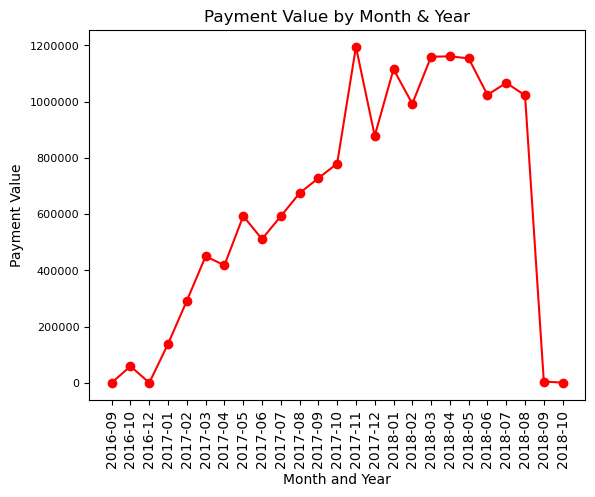

In [63]:
# creating a plot 
plt.plot(grouped_data['month_year'], grouped_data['payment_value'], color = 'red', marker = 'o')
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')
plt.xlabel('Month and Year')
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 8)
plt.ylabel('Payment Value')
plt.title('Payment Value by Month & Year')

In [65]:
# scatter plot
# create the dataframe
scatter_df = joined_data.groupby('customer_unique_id').agg({'payment_value': 'sum', 'payment_installments': 'sum'})
scatter_df

,payment_value,payment_installments
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,141.90,8
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,1
0000f46a3911fa3c0805444483337064,86.22,8
0000f6ccb0745a6a4b88665a16c9f078,43.62,4
0004aac84e0df4da2b147fca70cf8255,196.89,6
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,10
fffea47cd6d3cc0a88bd621562a9d061,84.58,1
ffff371b4d645b6ecea244b27531430a,112.46,1


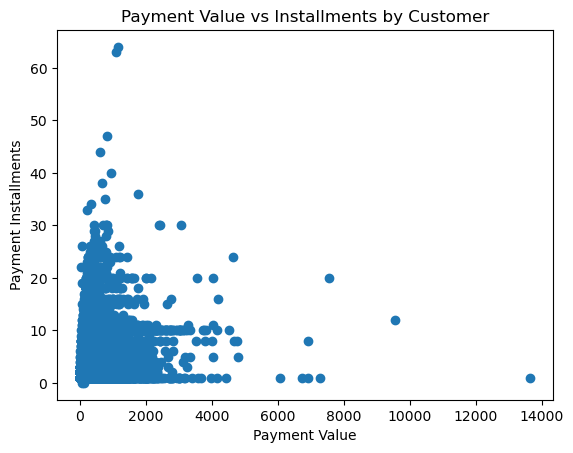

In [67]:
plt.scatter(scatter_df['payment_value'], scatter_df['payment_installments'])
plt.xlabel('Payment Value')
plt.ylabel('Payment Installments')
plt.title('Payment Value vs Installments by Customer')
plt.show()

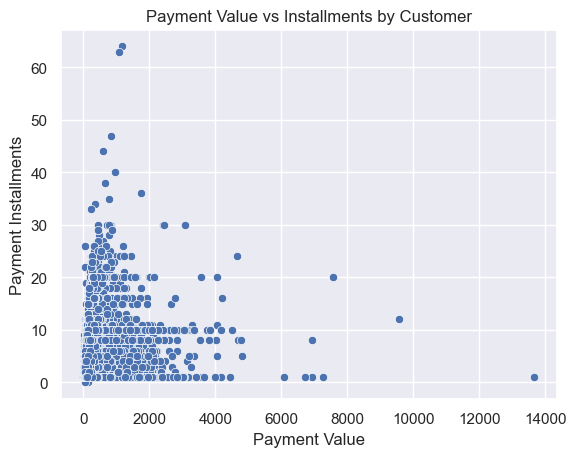

In [69]:
# using seaborn to create a scatterplot
sns.set_theme(style = 'darkgrid') #whitegrid, darkgrid, dark, white
sns.scatterplot(data = scatter_df, x = 'payment_value', y = 'payment_installments')
plt.xlabel('Payment Value')
plt.ylabel('Payment Installments')
plt.title('Payment Value vs Installments by Customer')
plt.show()

In [73]:
bar_chart_df = joined_data.groupby(['payment_type', 'month_year'])['payment_value'].sum()
bar_chart_df = bar_chart_df.reset_index()
bar_chart_df

,payment_type,month_year,payment_value
0,boleto,2016-10,9679.06
1,boleto,2017-01,24074.43
2,boleto,2017-02,57476.74
3,boleto,2017-03,82160.53
4,boleto,2017-04,81307.24
...,...,...,...
85,voucher,2018-06,23349.04
86,voucher,2018-07,19958.84
87,voucher,2018-08,34969.20
88,voucher,2018-09,4439.54


In [75]:
pivot_data = bar_chart_df.pivot(index = 'month_year', columns = 'payment_type', values = 'payment_value')
pivot_data

payment_type,boleto,credit_card,debit_card,not_defined,voucher
month_year,,,,,
2016-09,NaN,252.24,NaN,NaN,NaN
2016-10,9679.06,48290.62,241.73,NaN,879.07
2016-12,NaN,19.62,NaN,NaN,NaN
2017-01,24074.43,109615.68,743.53,NaN,4054.40
2017-02,57476.74,226753.56,1510.32,NaN,6167.39
2017-03,82160.53,354488.94,3592.80,NaN,9621.33
2017-04,81307.24,322087.72,2790.00,NaN,11603.07
2017-05,128652.90,445047.31,3023.41,NaN,16195.20
2017-06,107774.16,388268.27,2424.17,NaN,12809.78


Text(0.5, 1.0, 'Payment per Payment Type by Month')

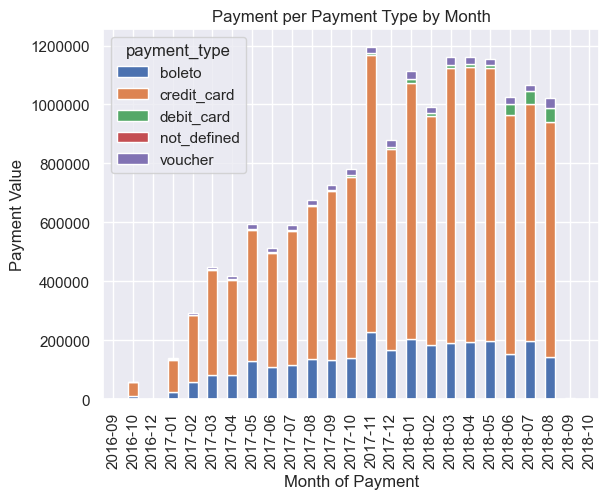

In [79]:
pivot_data.plot(kind = 'bar', stacked = 'True')
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')
plt.xlabel('Month of Payment')
plt.ylabel('Payment Value')
plt.title('Payment per Payment Type by Month')

In [80]:
# creating a boxplot
payment_values = joined_data['payment_value']
payment_types = joined_data['payment_type']

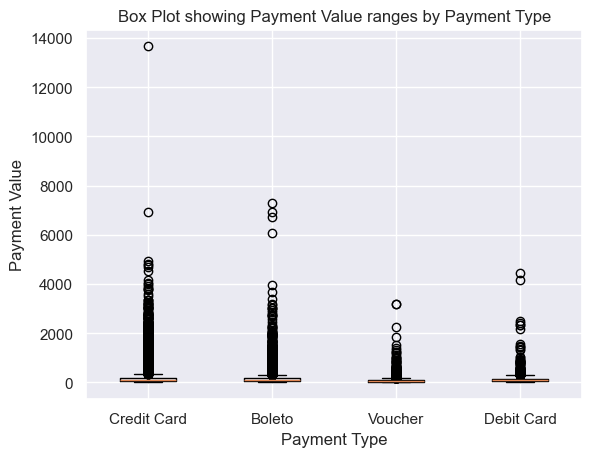

In [83]:
# creating a separate box plot per payment type
plt.boxplot([payment_values[payment_types == 'credit_card'],
             payment_values[payment_types == 'boleto'],
             payment_values[payment_types == 'voucher'],
             payment_values[payment_types == 'debit_card']],
             labels = ['Credit Card', 'Boleto', 'Voucher', 'Debit Card']
            )
# set labels and titles
plt.xlabel('Payment Type')
plt.ylabel('Payment Value')
plt.title('Box Plot showing Payment Value ranges by Payment Type')
plt.show()

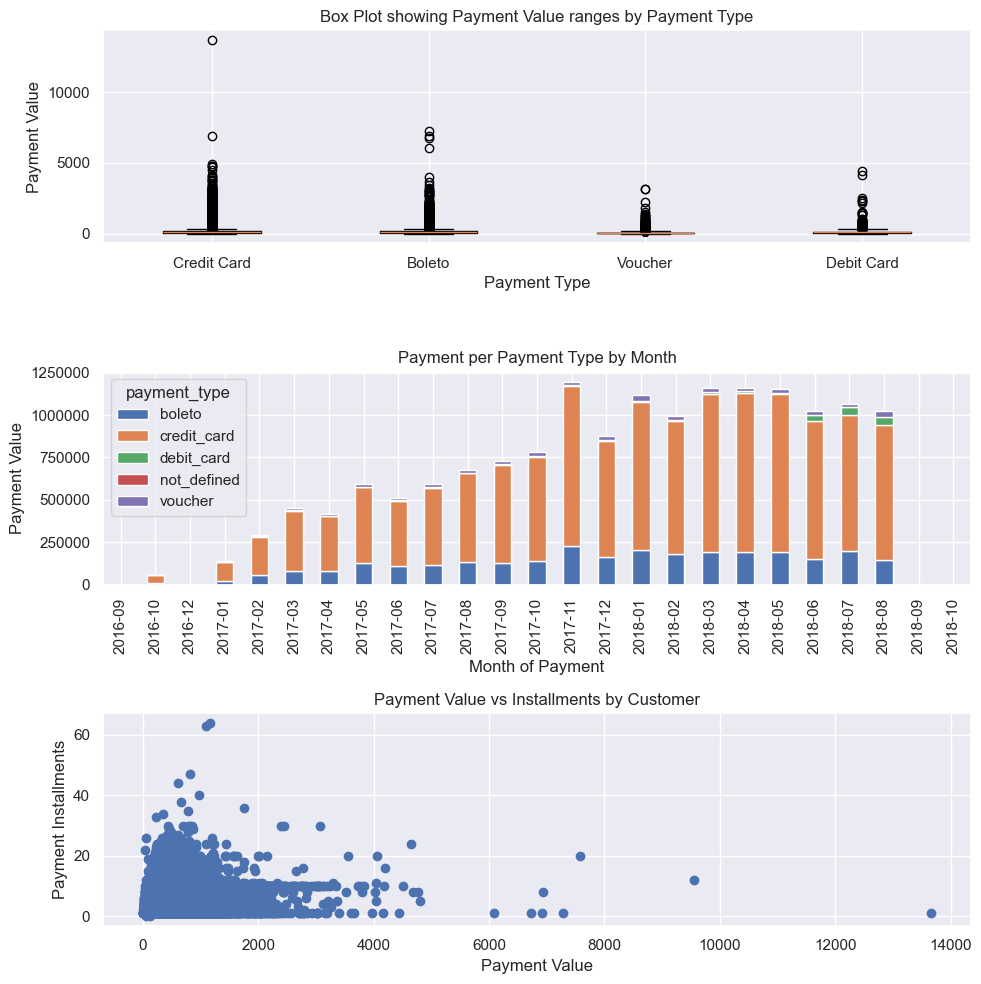

In [89]:
# creating a subplot (3 plots in one)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (10,10))

# ax1 which is boxplot

# creating a separate box plot per payment type
ax1.boxplot([payment_values[payment_types == 'credit_card'],
             payment_values[payment_types == 'boleto'],
             payment_values[payment_types == 'voucher'],
             payment_values[payment_types == 'debit_card']],
             labels = ['Credit Card', 'Boleto', 'Voucher', 'Debit Card']
            )
# set labels and titles
ax1.set_xlabel('Payment Type')
ax1.set_ylabel('Payment Value')
ax1.set_title('Box Plot showing Payment Value ranges by Payment Type')

# ax2 is the stacked bar chart

pivot_data.plot(kind = 'bar', stacked = 'True', ax = ax2)
ax2.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')

# set labels and titles
ax2.set_xlabel('Month of Payment')
ax2.set_ylabel('Payment Value')
ax2.set_title('Payment per Payment Type by Month')

# ax3 is the scatter plot

ax3.scatter(scatter_df['payment_value'], scatter_df['payment_installments'])

# set labels and titles
ax3.set_xlabel('Payment Value')
ax3.set_ylabel('Payment Installments')
ax3.set_title('Payment Value vs Installments by Customer')

fig.tight_layout()

plt.savefig('my_plot.png')